Desafio 38: Reclamações de Clientes

📂 Dataset: Reclamações registradas por clientes de uma empresa.
Colunas: ID, Data, Categoria, Meio_Contato, Tempo_Resposta (dias), Status

🎯 Tarefas:

Corrija inconsistências nos nomes da categoria (ex: "entrega").

Trate o valor ausente em Tempo_Resposta (dias).

Qual a média de tempo de resposta por meio de contato?

Qual categoria teve mais reclamações?

Crie um gráfico de pizza com a proporção de status das reclamações.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_38_reclamacoes_clientes.csv")
df.head()

,ID,Data,Categoria,Meio_Contato,Tempo_Resposta (dias),Status
0,RC0001,2024-01-06,Cobrança Indevida,Telefone,7.0,Não resolvida
1,RC0002,2024-01-12,Cobrança Indevida,Chat,9.0,Em andamento
2,RC0003,2024-01-26,Entrega,Redes Sociais,21.0,Resolvida
3,RC0004,2024-02-22,Produto com Defeito,E-mail,9.0,Não resolvida
4,RC0005,2024-03-17,Atendimento,Chat,15.0,Resolvida


In [6]:
#Corrija inconsistências nos nomes da categoria (ex: "entrega").
df["Categoria"] = df["Categoria"].str.title()
df["Categoria"].unique()

array(['Cobrança Indevida', 'Entrega', 'Produto Com Defeito',
       'Atendimento', 'Garantia'], dtype=object)

In [25]:
#Trate o valor ausente em Tempo_Resposta (dias).
df["Tempo_Resposta (dias)"] = pd.to_numeric(df["Tempo_Resposta (dias)"], errors="coerce")
df["Tempo_Resposta (dias)"] = df["Tempo_Resposta (dias)"].fillna(
    df.groupby("Categoria")["Tempo_Resposta (dias)"].transform("mean").round(2)
)

<class 'pandas.core.series.Series'>
RangeIndex: 450 entries, 0 to 449
Series name: Tempo_Resposta (dias)
Non-Null Count  Dtype  
--------------  -----  
450 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [28]:
#Qual a média de tempo de resposta por meio de contato?
mediaRespostaMeioContato = df.groupby("Meio_Contato")["Tempo_Resposta (dias)"].mean().round(2)
print(mediaRespostaMeioContato.to_string())

Meio_Contato
Chat             15.30
E-mail           15.50
Redes Sociais    14.78
Telefone         15.69


In [31]:
#Qual categoria teve mais reclamações?
categoriareclamacoes = df["Categoria"].value_counts()
print(f"Categoria com mais reclamações: {categoriareclamacoes.idxmax()} ({categoriareclamacoes.max()} reclamações)")

Categoria com mais reclamações: Cobrança Indevida (98 reclamações)


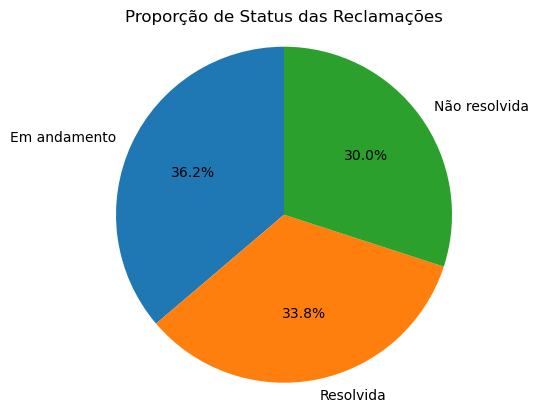

In [35]:
#Crie um gráfico de pizza com a proporção de status das reclamações.
statusreclamacoes = df["Status"].value_counts()

plt.pie(statusreclamacoes, labels=statusreclamacoes.index, autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Status das Reclamações")
plt.axis('equal')
plt.show()